# Vehicle Ownership Check

For all households in MA (or specified MPO).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

## define

In [2]:

mpos = ['BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', 'MVC',
       'MVPC', 'NMCOG', 'NPEDC', 'OCPC', 'PVPC', 'SRPEDD']

In [3]:
def veh_comp(csv_1, csv_2, csv_3, mpo=None, percent=True):
    # read csv
    df1 = pd.read_csv(csv_1)
    df1 = df1.rename(columns={'num_households':'rep19'})
    df2 = pd.read_csv(csv_2)
    df2 = df2.rename(columns={'num_households':'rep22'})
    df3 = pd.read_csv(csv_3)
    df3 = df3.rename(columns={'num_households':'rep23'})

    # filter on mpo; merge 
    if mpo is None:
        df = df1.copy() # keeping 'GQ'
    else:
        df = df1[df1['mpo']==mpo].copy()

    df = df.merge(df2, on = ['mpo','vehicles'], how = 'left')
    df = df.merge(df3, on = ['mpo','vehicles'])

    
    # Calculating percentages
    if percent:
        df = df[df['vehicles']!='GQ'].copy()
        veh_order = ['zero', '1', '2', '3_plus'] # not including 'GQ' if percent
        df['vehicles'] = pd.Categorical(df['vehicles'], categories=veh_order, ordered=True)

        grouped_sum = df.groupby('vehicles').sum().reset_index()
        total_1 = grouped_sum['rep19'].sum()
        total_2 = grouped_sum['rep22'].sum()
        total_3 = grouped_sum['rep23'].sum()

        grouped_sum['rep19_perc'] = grouped_sum['rep19'] / total_1 * 100
        grouped_sum['rep22_perc'] = grouped_sum['rep22'] / total_2 * 100
        grouped_sum['rep23_perc'] = grouped_sum['rep23'] / total_3 * 100

        draw_fields = ['rep19_perc','rep22_perc','rep23_perc']
    else:
        veh_order = ['zero', '1', '2', '3_plus', 'GQ']
        df['vehicles'] = pd.Categorical(df['vehicles'], categories=veh_order, ordered=True)

        grouped_sum = df.groupby('vehicles').sum().reset_index()

        draw_fields = ['rep19','rep22','rep23']


    print(grouped_sum)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(16, 8))
    bar_width = 0.2
    index = range(len(grouped_sum))

    bar1 = ax.bar([p - bar_width for p in index], grouped_sum[draw_fields[0]], bar_width, label='Replica 2019')
    bar2 = ax.bar([p for p in index], grouped_sum[draw_fields[1]], bar_width, label='Replica 2022')
    bar3 = ax.bar([p + bar_width for p in index], grouped_sum[draw_fields[2]], bar_width, label='Replica 2023')

    ax.set_xlabel('Vehicle Counts')
    ax.set_ylabel('Households')
    str1 = 'Percentage' if percent else 'Number'
    if mpo is None:
        title = str1 + ' of Households by Vehicle Counts (MA)'
    else:
        title = str1 + ' of Households by Vehicle Counts ('+mpo+')'
        grouped_sum.to_csv(mpo + '.csv')
    ax.set_title(title)
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(grouped_sum['vehicles'])
    ax.legend()

    plt.show()


## inputs

In [4]:
csv_1 = r'.\data\veh_mpo_rep19_v0820.csv'
csv_2 = r'.\data\veh_mpo_rep22_v0820.csv'
csv_3 = r'.\data\veh_mpo_rep23_v0813.csv'


## draw

  vehicles   rep19   rep22   rep23  rep19_perc  rep22_perc  rep23_perc
0     zero  324965  326859  325478   12.289268   12.001978   11.856038
1        1  931123  958691  975978   35.212470   35.202300   35.551503
2        2  950954  975271  972340   35.962423   35.811104   35.418984
3   3_plus  437257  462555  471455   16.535838   16.984618   17.173475


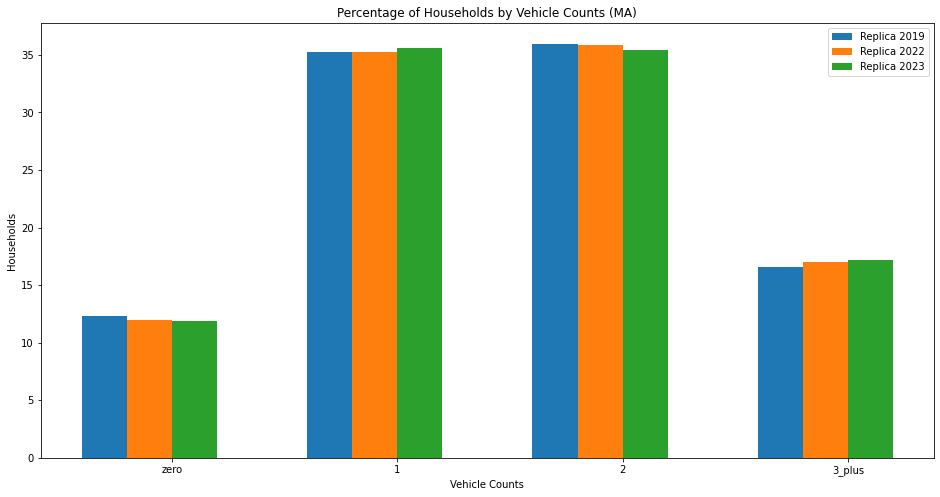

In [5]:
veh_comp(csv_1, csv_2, csv_3) #, percent=True)

  vehicles   rep19   rep22   rep23
0     zero  324965  326859  325478
1        1  931123  958691  975978
2        2  950954  975271  972340
3   3_plus  437257  462555  471455
4       GQ  247511  246195  228140


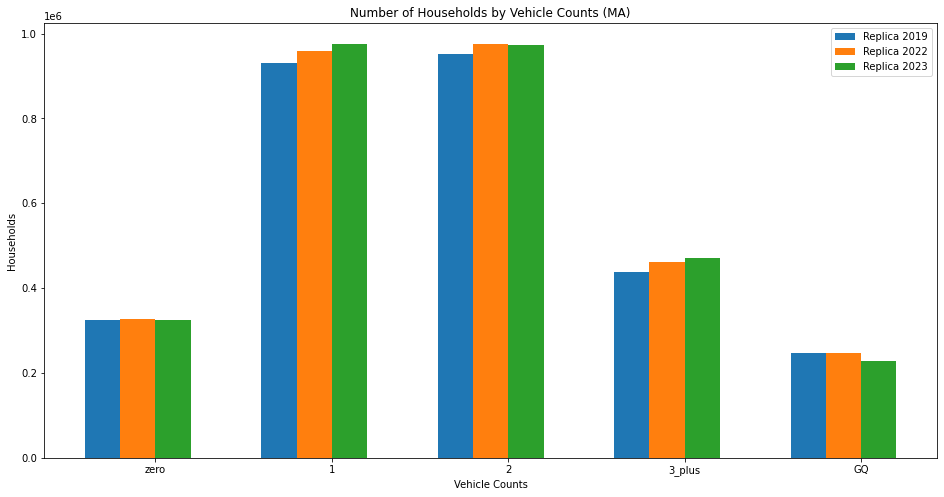

In [6]:
veh_comp(csv_1, csv_2, csv_3, percent=False)

## By MPO

In [7]:
@interact
def va_comp_each_rpa(mpo = mpos):
    veh_comp(csv_1, csv_2, csv_3, mpo)

interactive(children=(Dropdown(description='mpo', options=('BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', '…

BRMPO
  vehicles   rep19   rep22   rep23  rep19_perc  rep22_perc  rep23_perc
0     zero  201890  202930  204328   15.841231   15.557821   15.532404
1        1  469984  483939  494862   36.877138   37.101644   37.617931
2        2  432078  438546  435624   33.902856   33.621546   33.114835
3   3_plus  170507  178945  180681   13.378775   13.718989   13.734830


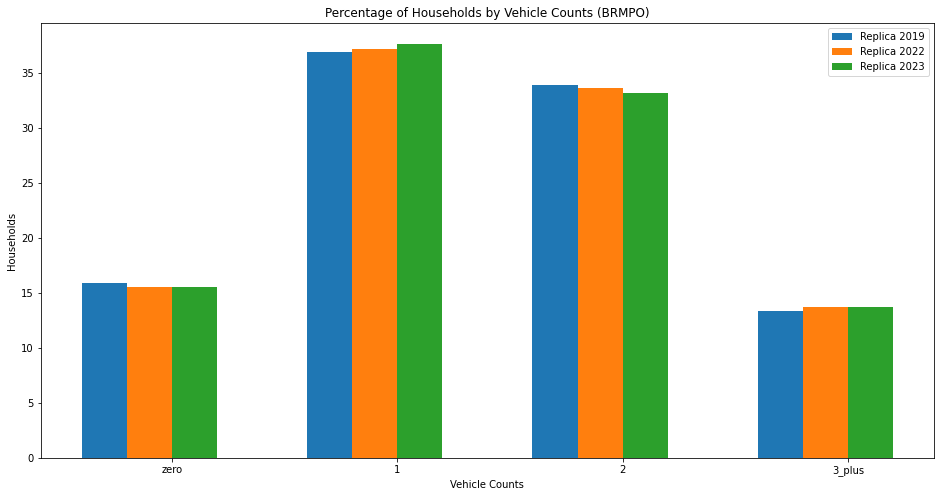

BRPC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero   4928   4952   5051    8.976321    8.839858    8.944889
1        1  21736  21484  21589   39.591985   38.351274   38.232273
2        2  20079  20882  21134   36.573770   37.276638   37.426507
3   3_plus   8157   8701   8694   14.857923   15.532230   15.396331


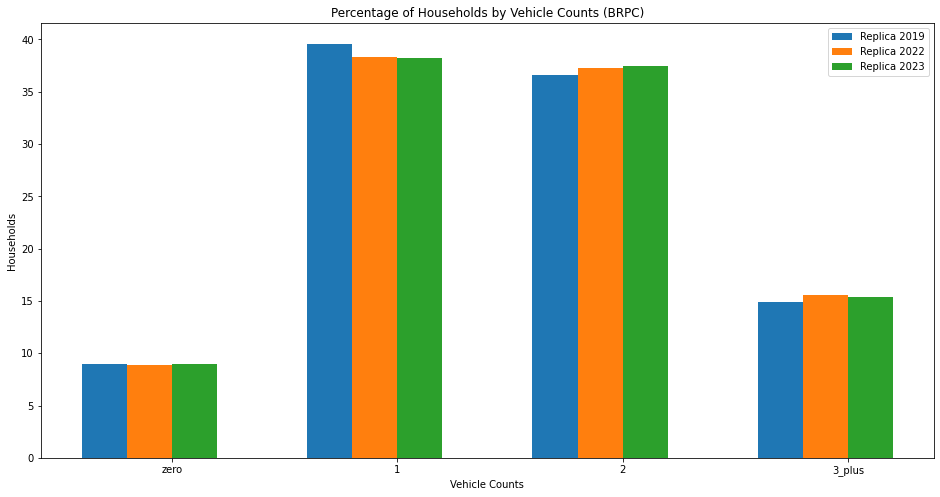

CCC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero   4433   4760   4858    4.686839    4.778877    4.801107
1        1  33027  34475  34073   34.918168   34.611716   33.673964
2        2  38106  38935  40709   40.287998   39.089403   40.232248
3   3_plus  19018  21435  21545   20.106995   21.520004   21.292682


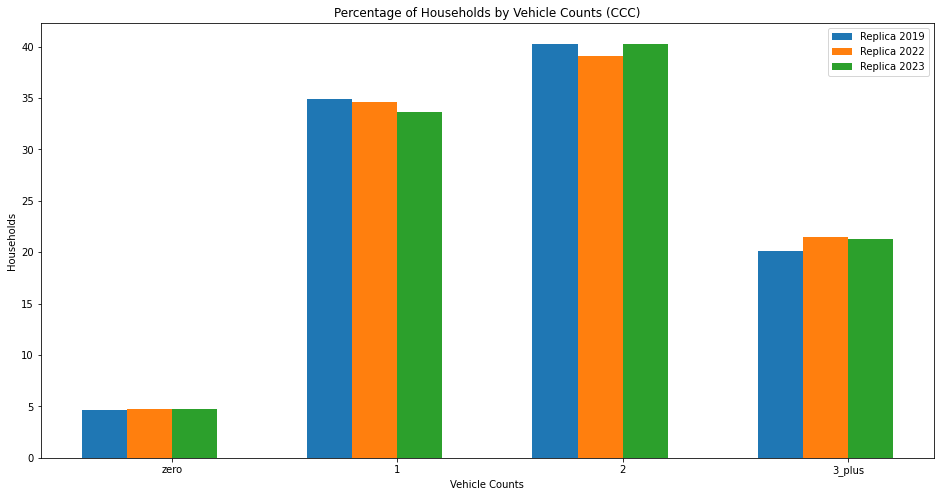

CMRPC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero  21697  21645  21306    9.902423    9.453947    9.237773
1        1  73673  75345  76243   33.624058   32.908645   33.057145
2        2  82209  87405  85891   37.519853   38.176124   37.240288
3   3_plus  41529  44557  47200   18.953667   19.461284   20.464794


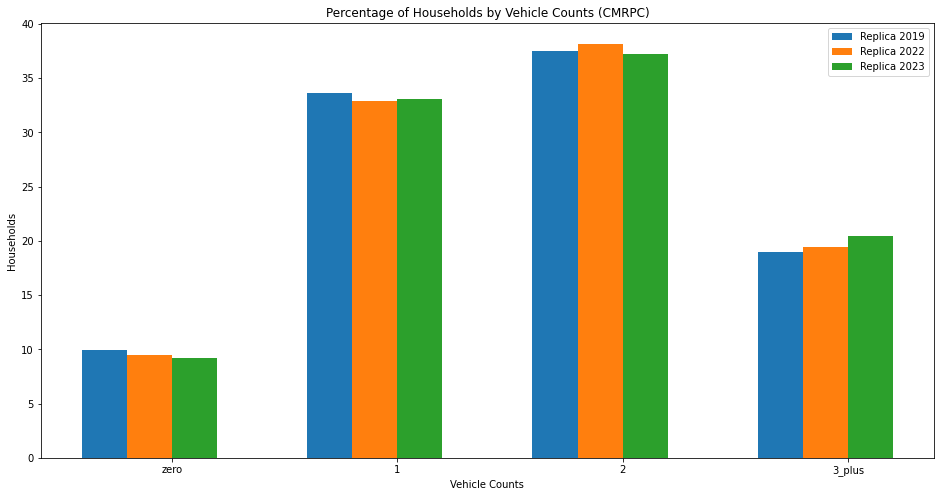

FRCOG
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero   2204   2580   2238    7.170511    8.321775    7.182746
1        1  10731  10681  10969   34.912321   34.451505   35.204442
2        2  12474  11830  12392   40.583011   38.157598   39.771487
3   3_plus   5328   5912   5559   17.334158   19.069122   17.841325


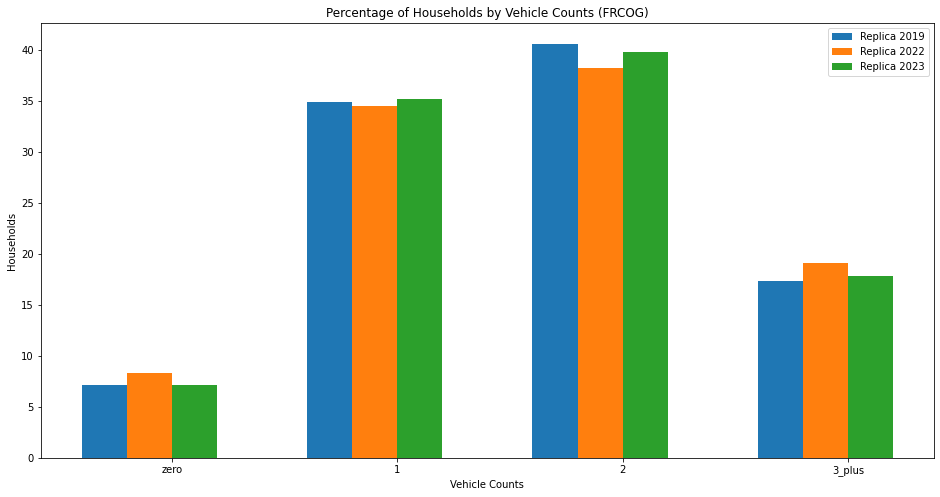

MRPC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero   7108   6868   6793    7.649838    7.068680    6.868832
1        1  28296  30811  32593   30.452985   31.711283   32.956844
2        2  37623  38495  37754   40.490976   39.619806   38.175457
3   3_plus  19890  20987  21756   21.406201   21.600231   21.998867


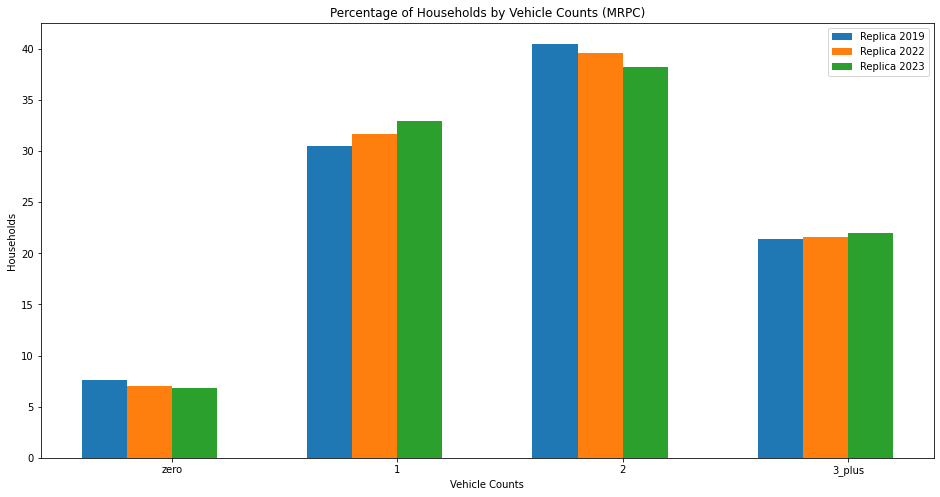

MVC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero    222    271    334    3.079057    3.605641    4.391847
1        1   2545   2371   2507   35.298197   31.546035   32.965155
2        2   2832   2497   2473   39.278779   33.222459   32.518080
3   3_plus   1611   2377   2291   22.343967   31.625865   30.124918


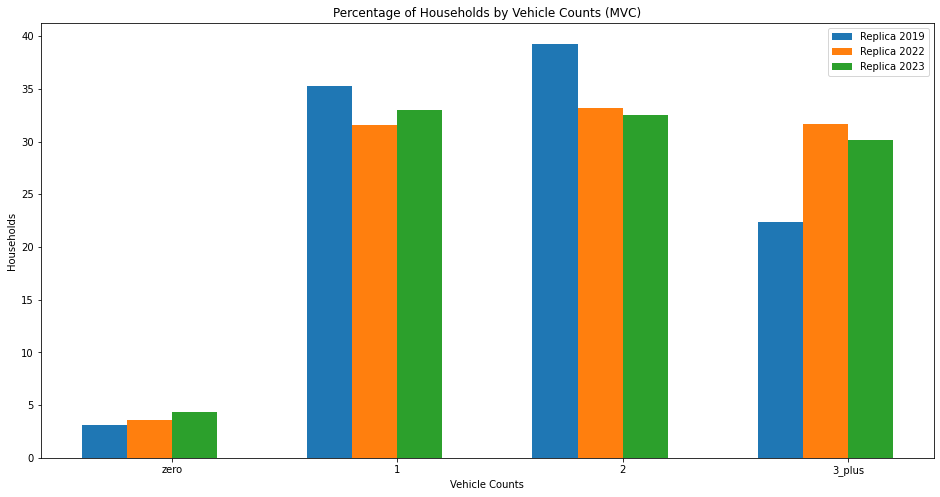

MVPC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero  12056  13004  11607    9.247526    9.542749    8.459789
1        1  43510  44787  46396   33.374243   32.866127   33.815834
2        2  50183  52167  51219   38.492751   38.281806   37.331088
3   3_plus  24621  26313  27980   18.885480   19.309317   20.393289


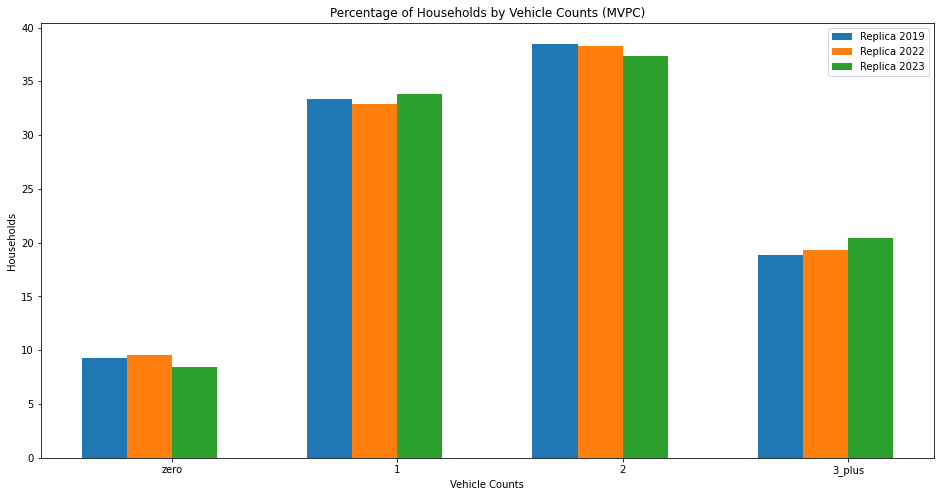

NMCOG
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero   9174   8741   8487    8.270155    7.678995    7.464249
1        1  34068  35206  35587   30.711536   30.928578   31.298482
2        2  44165  45329  44644   39.813755   39.821664   39.264041
3   3_plus  23522  24554  24984   21.204554   21.570763   21.973228


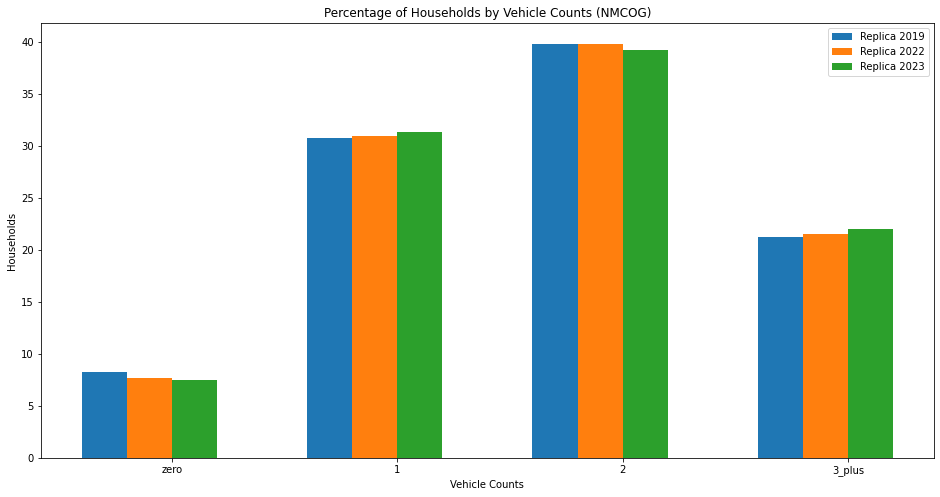

NPEDC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero    234    290    201    5.880875    6.450178    4.124769
1        1   1166   1185   1368   29.303845   26.356762   28.073056
2        2   1496   1586   2073   37.597386   35.275801   42.540529
3   3_plus   1083   1435   1231   27.217894   31.917260   25.261646


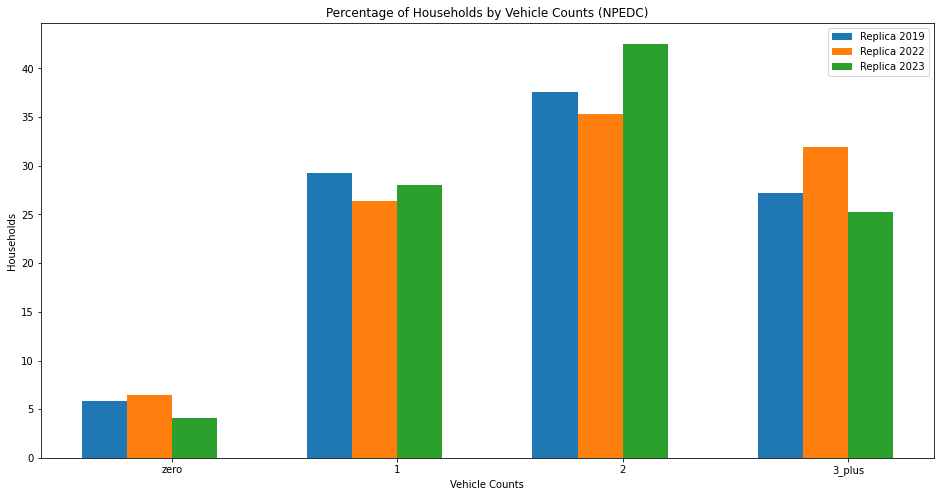

OCPC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero   9021  10138  10231    6.678611    7.187013    7.156597
1        1  40502  40652  41098   29.985267   28.818942   28.748103
2        2  54468  57842  58336   40.324861   41.005246   40.806105
3   3_plus  31082  32428  33294   23.011261   22.988799   23.289195


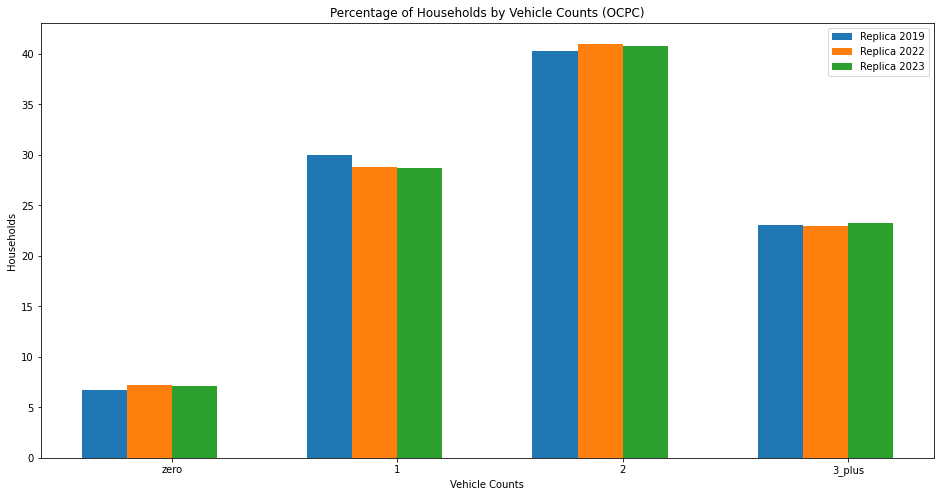

PVPC
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero  27922  26933  26450   11.585267   11.013650   10.801738
1        1  89724  90573  90659   37.227867   37.037809   37.023621
2        2  83304  85510  86005   34.564111   34.967408   35.123005
3   3_plus  40063  41526  41754   16.622755   16.981132   17.051636


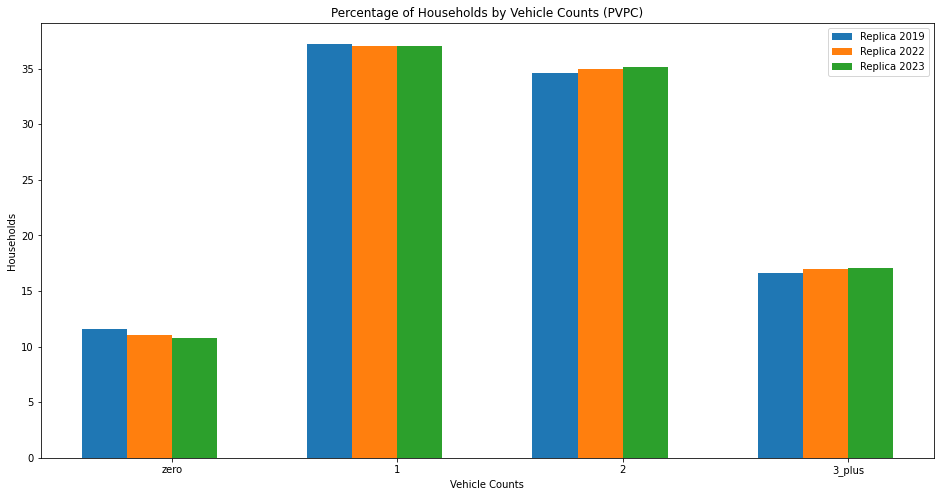

SRPEDD
  vehicles  rep19  rep22  rep23  rep19_perc  rep22_perc  rep23_perc
0     zero  24076  23747  23594    9.668300    9.184293    9.067640
1        1  82161  87182  88034   32.993735   33.718155   33.833205
2        2  91937  94247  94086   36.919525   36.450586   36.159108
3   3_plus  50846  53385  54486   20.418440   20.646965   20.940046


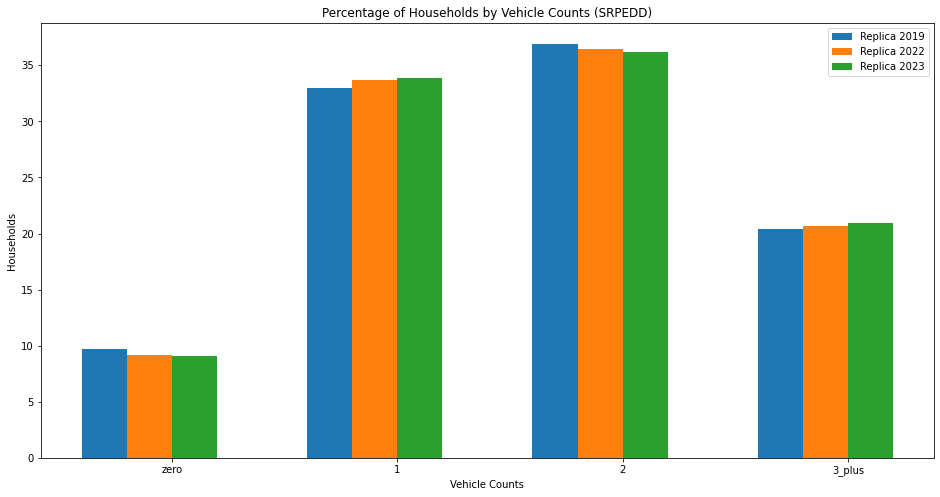

In [8]:
for mpo in mpos:
    print(mpo)
    veh_comp(csv_1, csv_2, csv_3, mpo)

# end